# Ensemble learning

Ensemble learning, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible🤸‍♀️ (less bias) and less data-sensitive🧘‍♀️ (less variance).

Two most popular ensemble methods are bagging and boosting.

Bagging: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data

Boosting: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

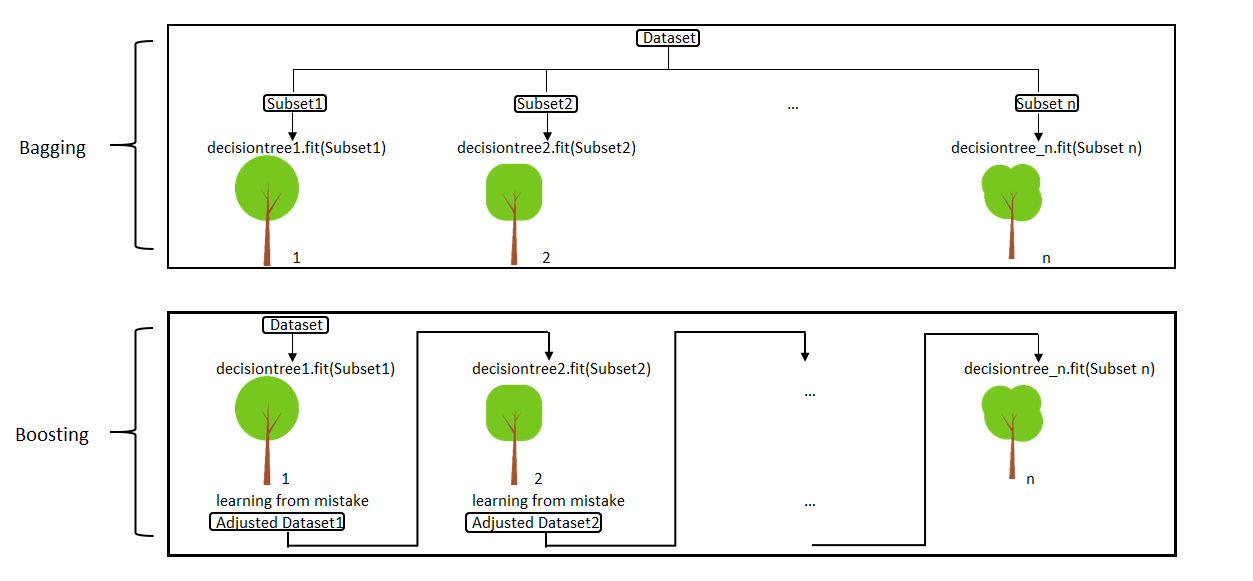

# will cover step by step explanation on Random Forest, AdaBoost, and Gradient Boosting, and their implementation in Python Sklearn.

# Random Forest

Random forest is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

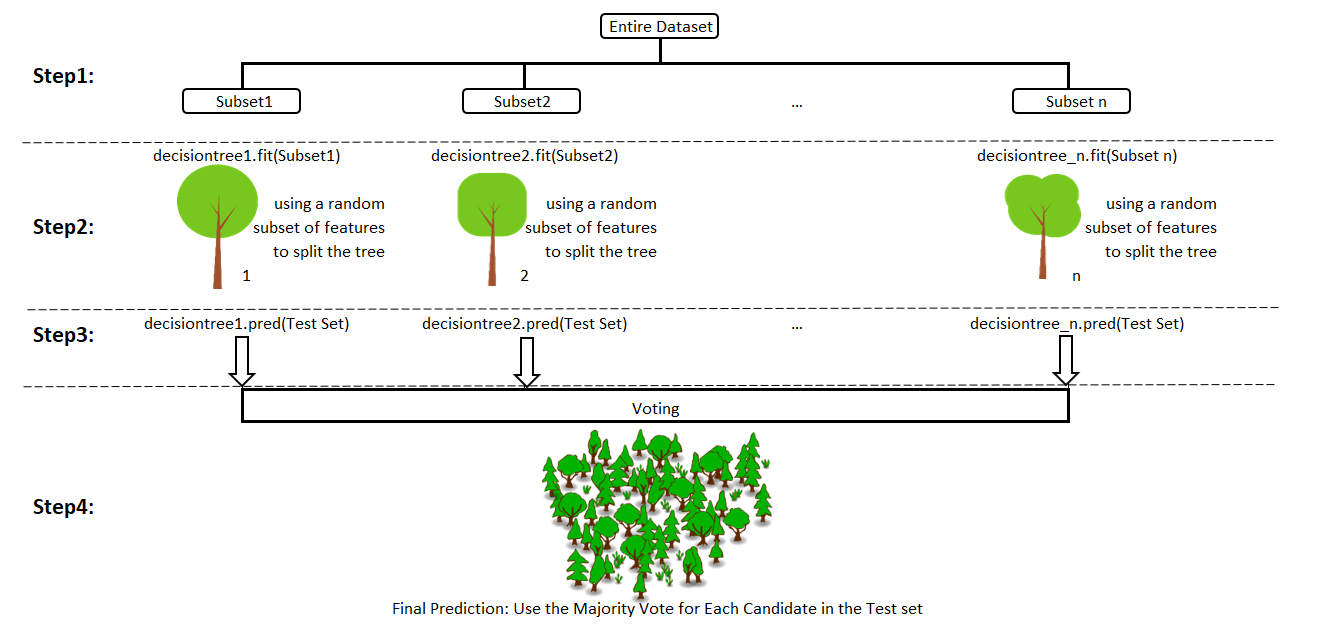

Step 1: Select n (e.g. 1000) random subsets from the training set

Step 2: Train n (e.g. 1000) decision trees
one random subset is used to train one decision tree
the optimal splits for each decision tree are based on a random subset of features (e.g. 10 features in total, randomly select 5 out of 10 features to split)

Step 3: Each individual tree predicts the records/candidates in the test set, independently.

Step 4: Make the final prediction

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the majority vote as this candidate’s final prediction.

# Implementation in Python

In [1]:
# Load Library
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
# Step1: Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

In [3]:
# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7555

In [5]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7965

# AdaBoost (Adaptive Boosting)

AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

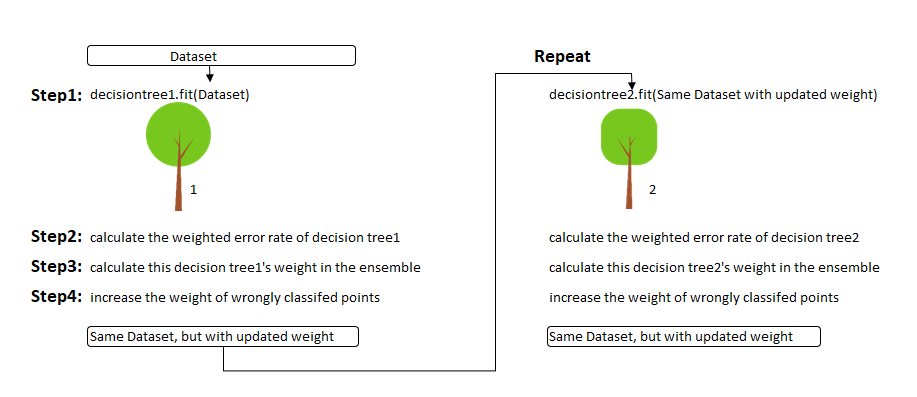

Step 0: Initialize the weights of data points. if the training set has 100 data points, then each point’s initial weight should be 1/100 = 0.01.

Step 1: Train a decision tree

Step 2: Calculate the weighted error rate (e) of the decision tree. The weighted error rate (e) is just how many wrong predictions out of total and you treat the wrong predictions differently based on its data point’s weight. The higher the weight, the more the corresponding error will be weighted during the calculation of the (e).

Step 3: Calculate this decision tree’s weight in the ensemble
the weight of this tree = learning rate * log( (1 — e) / e)
the higher weighted error rate of a tree, 😫, the less decision power the tree will be given during the later voting
the lower weighted error rate of a tree, 😃, the higher decision power the tree will be given during the later voting

Step 4: Update weights of wrongly classified points
the weight of each data point =
if the model got this data point correct, the weight stays the same
if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)
Note: The higher the weight of the tree (more accurate this tree performs), the more boost (importance) the misclassified data point by this tree will get. The weights of the data points are normalized after all the misclassified points are updated.

Step 5: Repeat Step 1(until the number of trees we set to train is reached)

Step 6: Make the final prediction
The AdaBoost makes a new prediction by adding up the weight (of each tree) multiply the prediction (of each tree). Obviously, the tree with higher weight will have more power of influence the final decision.

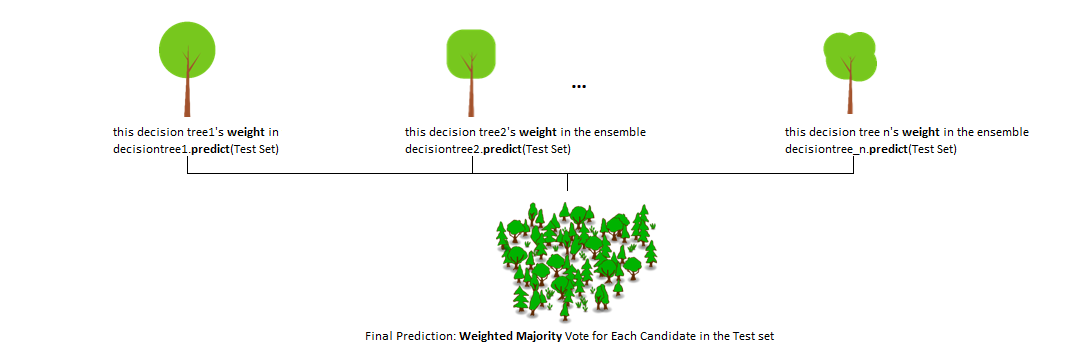

In [7]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.833

# Gradient Boosting

Gradient boosting is another boosting model. Remember, boosting model’s key is learning from the previous mistakes.

Gradient Boosting learns from the mistake — residual error directly, rather than update the weights of data points.

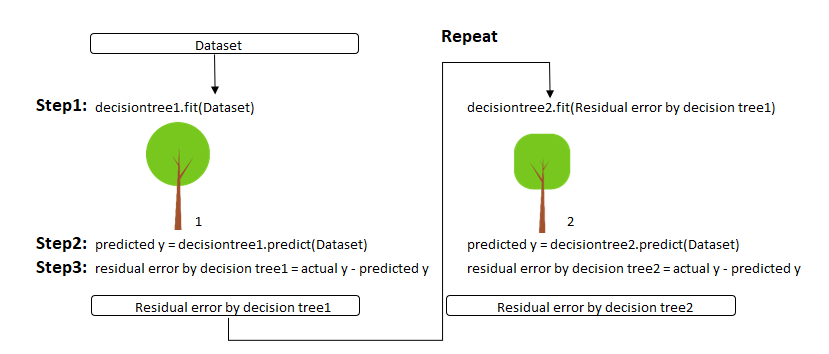

Step 1: Train a decision tree

Step 2: Apply the decision tree just trained to predict

Step 3: Calculate the residual of this decision tree, Save residual errors as the new y

Step 4: Repeat Step 1 (until the number of trees we set to train is reached)

Step 5: Make the final prediction

The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).

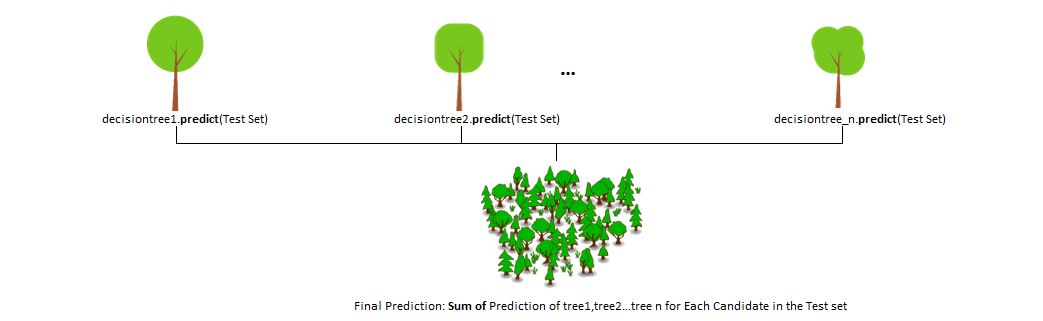

In [8]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8335

Overall, ensemble learning is very powerful and can be used not only for classification problem but regression also.
other individual models (linear model, SVM, etc.)can also be applied within the bagging or boosting ensembles, to lead better performance.